In [1]:
import pandas as pd
import numpy as np
import lucem_illud as li

import incels
import nltk
import gensim

import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns

In [3]:
main_df = incels.csv_loader('data/main_resp.csv')

In [37]:
main_df.drop_duplicates(['thread_title', 'comment_id'], inplace=True)

#drop comments with no text
main_df = main_df[main_df.raw_text.notnull()]

In [10]:
incelTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=10000, min_df=3, stop_words='english', norm='l2')
incelsTFVects = incelTFVectorizer.fit_transform(main_df['raw_text'])

In [11]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(incelsTFVects.toarray())
reduced_data = pca.transform(incelsTFVects.toarray())

In [13]:
main_df['slang'] = main_df['normal_tokens'].apply(lambda x: [x for x in x if x in incels.get_slang(3)])
main_df['slang'] = main_df['slang'].apply(lambda x: np.nan if len(x) == 0 else x)

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
main_df[main_df['slang'].notnull()]

,post_id,comment_id,thread_title,thread_tag,thread_author,thread_time,username,user_label,post_time,raw_text,tokens,normal_tokens,normal_tokens_POS,slang
id,,,,,,,,,,,,,,
main_1_0,1,0,Useful Links,NaN,SergeantIncel,2018-10-01 17:24:20,SergeantIncel,Admincel,2018-10-01 17:24:20,List of useful links:\n\nRules & FAQ\nIntroduc...,"[List, of, useful, links, Rules, FAQ, Introduc...","[list, useful, links, rules, faq, introduction...","[(list, NN), (useful, JJ), (links, NNS), (rule...","[blackpill, incel, incel]"
main_2_2,2,2,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,3uxp,Captain,2018-10-17 13:43:51,"I bet you're white, huge muscles and big arms ...","[I, bet, you, 're, white, huge, muscles, and, ...","[bet, white, huge, muscles, big, arms, reserve...","[(bet, VB), (white, JJ), (huge, JJ), (muscles,...",[bbc]
main_2_3,2,3,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,Hunter,Banned,2018-10-17 13:46:34,"@MaxZM98 \n\nNoFap, now!","[@MaxZM98, NoFap, now]","[@maxzm98, nofap]","[(@maxzm98, NNP), (nofap, NNP)]",[nofap]
main_2_4,2,4,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,MaxZM98,Socially constructed loser,2018-10-17 13:47:12,"itsmemario said:\n\n\n\nYou, have a shitty tra...","[itsmemario, said, You, have, a, shitty, train...","[itsmemario, shitty, training, plan, shitty, m...","[(itsmemario, NNP), (said, VBD), (shitty, JJ),...",[bbc]
main_2_7,2,7,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,AdolfausKurdistan,Banned,2018-10-17 13:51:15,"3uxp said:\n\n\n\nI bet you're white, huge mus...","[3uxp, said, I, bet, you, 're, white, huge, mu...","[3uxp, bet, white, huge, muscles, big, arms, r...","[(3uxp, NN), (said, VBD), (bet, JJ), (white, J...","[bbc, cope]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
main_600_1,600,1,Should you kiss on first date?,[SuicideFuel],CopeWithTheRope,2018-12-01 04:51:29,cucktearslol,★★★★★,2018-12-01 04:52:17,"Chad fucks on the first date, let alone kiss","[Chad, fucks, on, the, first, date, let, alone...","[chad, fucks, date, let, kiss]","[(chad, NNP), (fucks, NNS), (date, NN), (let, ...",[chad]
main_600_4,600,4,Should you kiss on first date?,[SuicideFuel],CopeWithTheRope,2018-12-01 04:51:29,acnescarcel,Overlord,2018-12-01 05:40:13,dating=ur a cuck. chad had a one night stand w...,"[dating, =, ur, a, cuck, chad, had, a, one, ni...","[dating, =, ur, cuck, chad, night, stand, ur, ...","[(dating, VBG), (=, NFP), (ur, NNP), (cuck, NN...","[cuck, chad]"
main_601_3,601,3,Which group has the most privelage,NaN,Inceldo,2018-12-01 04:33:06,cucktearslol,its over,2018-12-01 04:36:43,"Stacy's, isn't that obvious","[Stacy, 's, is, n't, that, obvious]","[stacy, obvious]","[(stacy, NN), (obvious, JJ)]",[stacy]


In [22]:
main_df['comment_length'] = main_df['raw_text'].apply(lambda x: len(x))

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
main_df['number_responses'] = np.nan
main_df['total_response_length'] = np.nan

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
parents = {}
parents_length = {}
for row in main_df.iterrows():
    if row[1]['comment_id'] == 0:
        parents[row[1]['post_id']] = 0
        parents_length[row[1]['post_id']] = 0
    elif row[1]['post_id'] in parents.keys():
        parents[row[1]['post_id']] += 1
        parents_length[row[1]['post_id']] += row[1]['comment_length']


In [42]:
#use parents dictionary to fill number_responses
for row in main_df.iterrows():
    if row[1]['comment_id'] == 0:
        main_df.loc[row[0], 'number_responses'] = parents[row[1]['post_id']]
        main_df.loc[row[0], 'total_response_length'] = parents_length[row[1]['post_id']]

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [43]:
main_df

,post_id,comment_id,thread_title,thread_tag,thread_author,thread_time,username,user_label,post_time,raw_text,tokens,normal_tokens,normal_tokens_POS,slang,comment_length,number_responses,total_response_length
id,,,,,,,,,,,,,,,,,
main_1_0,1.0,0.0,Useful Links,NaN,SergeantIncel,2018-10-01 17:24:20,SergeantIncel,Admincel,2018-10-01 17:24:20,List of useful links:\n\nRules & FAQ\nIntroduc...,"[List, of, useful, links, Rules, FAQ, Introduc...","[list, useful, links, rules, faq, introduction...","[(list, NN), (useful, JJ), (links, NNS), (rule...","[blackpill, incel, incel]",193.0,0.0,0.0
main_2_0,2.0,0.0,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,MaxZM98,Socially constructed loser,2018-10-17 13:38:33,I was looking at myself in the gym mirror and ...,"[I, was, looking, at, myself, in, the, gym, mi...","[looking, gym, mirror, arms, look, like, nt, l...","[(looking, VBG), (gym, NN), (mirror, NN), (arm...",NaN,204.0,15.0,3250.0
main_2_1,2.0,1.0,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,itsmemario,Banned,2018-10-17 13:43:07,"You, have a shitty training plan or shitty mea...","[You, have, a, shitty, training, plan, or, shi...","[shitty, training, plan, shitty, meal, plan, h...","[(shitty, JJ), (training, NN), (plan, NN), (sh...",NaN,190.0,NaN,NaN
main_2_2,2.0,2.0,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,3uxp,Captain,2018-10-17 13:43:51,"I bet you're white, huge muscles and big arms ...","[I, bet, you, 're, white, huge, muscles, and, ...","[bet, white, huge, muscles, big, arms, reserve...","[(bet, VB), (white, JJ), (huge, JJ), (muscles,...",[bbc],72.0,NaN,NaN
main_2_3,2.0,3.0,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,Hunter,Banned,2018-10-17 13:46:34,"@MaxZM98 \n\nNoFap, now!","[@MaxZM98, NoFap, now]","[@maxzm98, nofap]","[(@maxzm98, NNP), (nofap, NNP)]",[nofap],22.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
main_601_12,601.0,12.0,Which group has the most privelage,NaN,Inceldo,2018-12-01 04:33:06,Romello Gaghan 2,No Descriptor,2018-12-01 05:19:59,"Lynne said:\n\n\n\nJewish, Wiccan, Transgender...","[Lynne, said, Jewish, Wiccan, Transgender, non...","[lynne, jewish, wiccan, transgender, non, bina...","[(lynne, NNP), (said, VBD), (jewish, JJ), (wic...",NaN,454.0,NaN,NaN
main_601_13,601.0,13.0,Which group has the most privelage,NaN,Inceldo,2018-12-01 04:33:06,RandomGuy,Legend,2018-12-01 05:23:48,foids followed by jews\n\nClick to expand...,"[foids, followed, by, jews, Click, to, expand]","[foids, followed, jews]","[(foids, NNS), (followed, VBD), (jews, NNPS), ...",NaN,42.0,NaN,NaN
main_601_14,601.0,14.0,Which group has the most privelage,NaN,Inceldo,2018-12-01 04:33:06,FuckingDed,Officer,2018-12-01 05:28:00,1. Foids\n2. Chads,"[1, Foids, 2, Chads]","[foids, chads]","[(foids, NNS), (chads, VBZ)]",NaN,17.0,NaN,NaN


In [44]:
top_comments = main_df[main_df['number_responses'] > 0]

In [55]:
top_comments['use_slang'] = top_comments['slang'].apply(lambda x: 1 if not x == 0 and len(x) > 0 else 0)
top_comments['author_banned'] = top_comments['user_label'].apply(lambda x: 1 if x.lower() == 'banned' else 0)

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
top_comments['avg_response_length'] = top_comments['total_response_length'] / top_comments['number_responses']

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([39., 57., 48., 40., 39., 19., 29., 17., 15., 14., 15., 12., 10.,
         8.,  8.,  9.,  6.,  6.,  4.,  4.,  1.,  6.,  6.,  3.,  3.,  2.,
         2.,  1.,  0.,  5.,  2.,  1.,  1.,  0.,  0.,  3.,  2.,  3.,  1.,
         0.,  0.,  1.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([3.00000e+00, 6.25800e+01, 1.22160e+02, 1.81740e+02, 2.41320e+02,
        3.00900e+02, 3.60480e+02, 4.20060e+02, 4.79640e+02, 5.39220e+02,
        5.98800e+02, 6.58380e+02, 7.17960e+02, 7.77540e+02, 8.37120e+02,
        8.96700e+02, 9.56280e+02, 1.01586e+03, 1.07544e+03, 1.13502e+03,
        1.19460e+03, 1.25418e+03, 1.31376e+03, 1.37334e+03, 1.43292e+03,
        1.49250e+03, 1.55208e+03, 1.61166e+03, 1.67124e+03, 1.73082e+

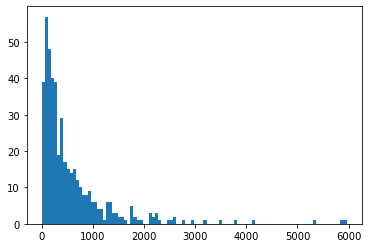

In [60]:
#plot length of comments
plt.hist(top_comments['comment_length'], bins=100)

In [62]:
print('Median comment length:', np.median(top_comments['comment_length']))
print('Mean comment length:', np.mean(top_comments['comment_length']))
print('Standard deviation of comment length:', np.std(top_comments['comment_length']))
print('Lower Quartile comment length:', np.percentile(top_comments['comment_length'], 25))
print('Upper Quartile comment length:', np.percentile(top_comments['comment_length'], 75))

Median comment length: 315.0
Mean comment length: 569.4955947136564
Standard deviation of comment length: 743.1571262510871
Lower Quartile comment length: 148.25
Upper Quartile comment length: 709.75


In [63]:
main_df['length_quartile'] = pd.qcut(main_df['comment_length'], 4, labels=['1st', '2nd', '3rd', '4th'])

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)

    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                color=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', color="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))


In [77]:
X = incelsTFVects.toarray()

Silhouette plots didn't reveal much

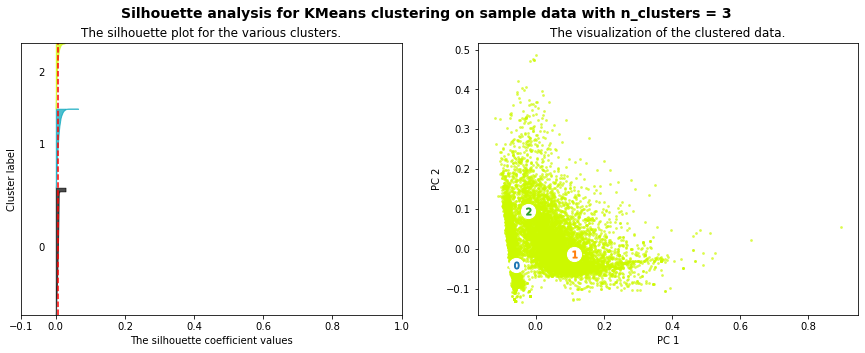

For n_clusters = 3, The average silhouette_score is : 0.006


In [78]:
plotSilhouette(3, X)

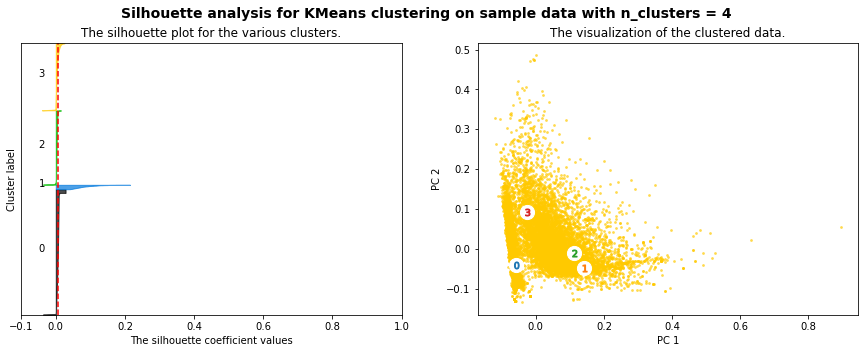

For n_clusters = 4, The average silhouette_score is : 0.006


In [79]:
plotSilhouette(4, X)

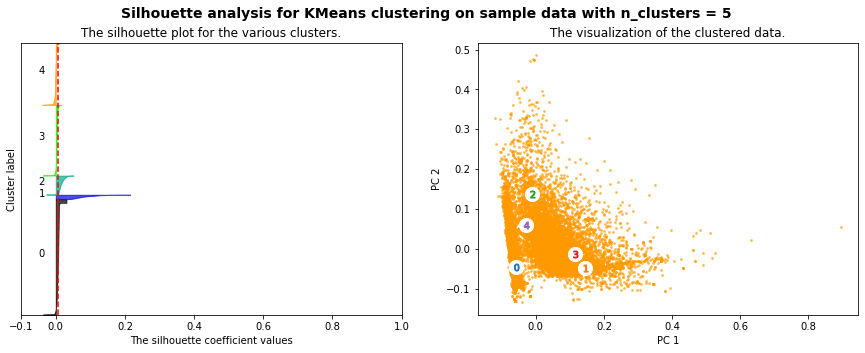

For n_clusters = 5, The average silhouette_score is : 0.006


In [80]:
plotSilhouette(5, X)

In [81]:
def dropMissing(words, vocab, exclude=[]):
    return [word for word in words if word in vocab and not word in exclude]

main_df['reduced_tokens'] = main_df['normal_tokens'].apply(lambda x: dropMissing(x, incelTFVectorizer.vocabulary_.keys(), ['like']))

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [83]:
dictionary = gensim.corpora.Dictionary(main_df['reduced_tokens'])
corpus = [dictionary.doc2bow(text) for text in main_df['reduced_tokens']]
gensim.corpora.MmCorpus.serialize('main.mm', corpus)
mainMM = gensim.corpora.MmCorpus('main.mm')

In [85]:
mainLDA = gensim.models.ldamodel.LdaModel(corpus=mainMM, id2word=dictionary, num_topics=5, alpha='auto', eta='auto')

In [86]:
ldaDF = pd.DataFrame({
    'title': main_df['thread_title'],
    'author': main_df['username'],
    'topics': [mainLDA[dictionary.doc2bow(text)] for text in main_df['reduced_tokens']]
})

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(mainLDA.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(mainLDA.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

,title,author,topics,topic_0,topic_1,topic_2,topic_3,topic_4
id,,,,,,,,
main_2_0,My arms are so small,MaxZM98,"[(0, 0.013247488), (2, 0.9489306), (3, 0.01464...",0.013247,0.000000,0.948931,0.014642,0.013470
main_4_47,7'2 Giga Chad - The Man Who Mogs Every Human i...,Pariah,"[(0, 0.6509503), (1, 0.3131718), (3, 0.0142736...",0.650950,0.313172,0.000000,0.014274,0.012956
main_7_9,Are there any blackpilled therapists?,Ritalincel,"[(0, 0.07137532), (1, 0.0525132), (2, 0.049725...",0.071375,0.052513,0.049726,0.079165,0.747220
main_9_8,Should West be nuked like in Mw1 due to hypergamy,Ritalincel,"[(0, 0.07159082), (1, 0.052615177), (2, 0.7203...",0.071591,0.052615,0.720350,0.079401,0.076043
main_13_17,Do you think it's possible to be truly happy a...,tulasdanslos,"[(0, 0.54243433), (1, 0.017315174), (2, 0.2355...",0.542434,0.017315,0.235536,0.180349,0.024366
...,...,...,...,...,...,...,...,...
main_585_38,Would you trade an inch in penis size for four...,_incelinside,"[(0, 0.043746933), (1, 0.031330332), (2, 0.029...",0.043747,0.031330,0.029523,0.047251,0.848149
main_590_17,Feminism is dying,Arthas93,"[(0, 0.011366043), (2, 0.46792346), (3, 0.0130...",0.011366,0.000000,0.467923,0.013008,0.499492
main_592_37,Update on my break from this site. [JFL],Virginp0wers,"[(0, 0.027230283), (1, 0.01962105), (2, 0.0184...",0.027230,0.019621,0.018456,0.030440,0.904252


In [97]:
N = 10
ldaDF_sample = ldaDF.sample(n=N)
K = mainLDA.num_topics  # N documents, K topics
ldaDFV = ldaDF_sample[['topic_%d' %x for x in range(K)]]
ldaDFVisN = ldaDF_sample[:N].index
ldaDFVis = ldaDFV.to_numpy()
ldaDFVisNames = ldaDFVisN.to_numpy()
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4
id,,,,,
main_197_13,0.611559,0.000000,0.000000,0.013333,0.358267
main_557_19,0.106973,0.079110,0.586945,0.117855,0.109117
main_589_15,0.023689,0.017269,0.016278,0.026121,0.916644
main_120_13,0.018376,0.013076,0.930146,0.020145,0.018257
main_390_20,0.010115,0.328982,0.083939,0.277796,0.299169
main_29_974,0.000000,0.731940,0.000000,0.000000,0.256597
main_29_154,0.318741,0.013187,0.012457,0.637164,0.018450
main_29_708,0.154105,0.000000,0.410185,0.360418,0.071652
main_509_6,0.026919,0.280481,0.018445,0.646923,0.027232


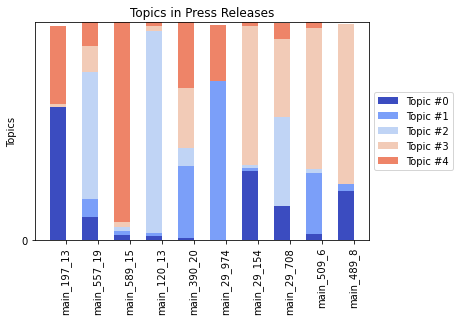

In [98]:
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Press Releases')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, N))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  if sys.path[0] == '':


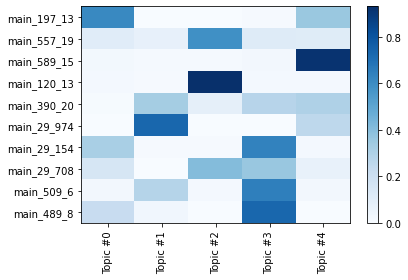

In [99]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [100]:
topicsDict = {}
for topicNum in range(mainLDA.num_topics):
    topicWords = [w for w, p in mainLDA.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,people,shit,know,women,incel
1,white,fucking,good,men,incels
2,fuck,got,iq,chad,men
3,women,hair,nt,want,people
4,nt,going,low,life,life
5,looks,know,tbh,sex,fucking
6,foids,fuck,way,ugly,time
7,fucking,time,shit,people,cope
8,think,face,high,guy,good
9,lol,foid,look,think,think


<Figure size 432x288 with 0 Axes>

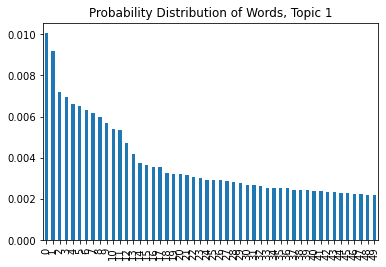

In [101]:
topic1_df = pd.DataFrame(mainLDA.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

In [103]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [105]:
gensimvis.prepare(mainLDA, mainMM, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.082912  0.009040       1        1  26.531665
1      0.128253 -0.080966       2        1  22.293352
4     -0.073540 -0.078109       3        1  19.131202
0     -0.074164  0.056469       4        1  17.186896
2      0.102363  0.093565       5        1  14.856884, topic_info=        Term         Freq        Total Category  logprob  loglift
176    women  2047.000000  2047.000000  Default  30.0000  30.0000
160      men  1519.000000  1519.000000  Default  29.0000  29.0000
7     incels   749.000000   749.000000  Default  28.0000  28.0000
52     white  1007.000000  1007.000000  Default  27.0000  27.0000
6      incel  1305.000000  1305.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
388      try   169.073037   661.313495   Topic5  -5.5923   0.5428
919     girl   172.215441   720.809986   Topic5  -5.5738   0.4751
119     time   197.932565  1311.800934   Topic5  -5.4347   0.0155
393  getting   152.117610   847.512529   Topic5  -5.6979   0.1891
174     want   157.955762  1383.089197   Topic5  -5.6603  -0.2631

[424 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2416      2  0.975113         acne
2416      3  0.012038         acne
2416      4  0.006019         acne
2416      5  0.006019         acne
1907      4  0.981733  acnescarcel
...     ...       ...          ...
182       5  0.153058          yes
691       2  0.994761        youth
4576      1  0.018298        zesto
4576      2  0.018298        zesto
4576      3  0.969799        zesto

[964 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 1, 3])

In [106]:
main_df['topic_0'] = ldaDF['topic_0']
main_df['topic_1'] = ldaDF['topic_1']
main_df['topic_2'] = ldaDF['topic_2']
main_df['topic_3'] = ldaDF['topic_3']
main_df['topic_4'] = ldaDF['topic_4']

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [111]:
main_df.to_csv('main_detailed.csv')

In [3]:
main_df = incels.csv_loader('main_detailed.csv')

In [105]:
from transformers import pipeline
nlp = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [5]:
titles = list(main_df['thread_title'].unique())

In [6]:
sentiments = {}
for title in titles:
    result = nlp(title)[0]
    main_df.loc[main_df['thread_title'] == title, 'sentiment_label'] = result['label']
    main_df.loc[main_df['thread_title'] == title, 'sentiment_score'] = result['score']
    sentiments[title] = (result['label'], result['score'])

In [9]:
main_df

,post_id,comment_id,thread_title,thread_tag,thread_author,thread_time,username,user_label,post_time,raw_text,...,length_quartile,reduced_tokens,topic_0,topic_1,topic_2,topic_3,topic_4,sentiment_label,sentiment_score,sentiment_polarity
id,,,,,,,,,,,,,,,,,,,,,
main_1_0,1.0,0.0,Useful Links,NaN,SergeantIncel,2018-10-01 17:24:20,SergeantIncel,Admincel,2018-10-01 17:24:20,List of useful links:\n\nRules & FAQ\nIntroduc...,...,3rd,"['list', 'useful', 'links', 'rules', 'introduc...",0.000000,0.048980,0.000000,0.010219,0.925114,POSITIVE,0.999593,0.999593
main_2_0,2.0,0.0,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,MaxZM98,Socially constructed loser,2018-10-17 13:38:33,I was looking at myself in the gym mirror and ...,...,3rd,"['looking', 'gym', 'mirror', 'arms', 'look', '...",0.013247,0.000000,0.948931,0.014642,0.013470,NEGATIVE,0.505297,-0.505297
main_2_1,2.0,1.0,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,itsmemario,Banned,2018-10-17 13:43:07,"You, have a shitty training plan or shitty mea...",...,3rd,"['shitty', 'training', 'plan', 'shitty', 'meal...",0.012106,0.000000,0.953846,0.013401,0.011997,NEGATIVE,0.505297,-0.505297
main_2_2,2.0,2.0,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,3uxp,Captain,2018-10-17 13:43:51,"I bet you're white, huge muscles and big arms ...",...,2nd,"['bet', 'white', 'huge', 'muscles', 'big', 'ar...",0.024265,0.017289,0.621499,0.312280,0.024667,NEGATIVE,0.505297,-0.505297
main_2_3,2.0,3.0,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,Hunter,Banned,2018-10-17 13:46:34,"@MaxZM98 \n\nNoFap, now!",...,1st,['nofap'],0.108892,0.079116,0.074626,0.118629,0.618737,NEGATIVE,0.505297,-0.505297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
main_601_12,601.0,12.0,Which group has the most privelage,NaN,Inceldo,2018-12-01 04:33:06,Romello Gaghan 2,No Descriptor,2018-12-01 05:19:59,"Lynne said:\n\n\n\nJewish, Wiccan, Transgender...",...,4th,"['lynne', 'jewish', 'transgender', 'non', 'nat...",0.071811,0.000000,0.261803,0.605310,0.056220,NEGATIVE,0.940899,-0.940899
main_601_13,601.0,13.0,Which group has the most privelage,NaN,Inceldo,2018-12-01 04:33:06,RandomGuy,Legend,2018-12-01 05:23:48,foids followed by jews\n\nClick to expand...,...,1st,"['foids', 'followed', 'jews']",0.053664,0.039150,0.036893,0.059138,0.811156,NEGATIVE,0.940899,-0.940899
main_601_14,601.0,14.0,Which group has the most privelage,NaN,Inceldo,2018-12-01 04:33:06,FuckingDed,Officer,2018-12-01 05:28:00,1. Foids\n2. Chads,...,1st,"['foids', 'chads']",0.073450,0.052390,0.049418,0.750371,0.074371,NEGATIVE,0.940899,-0.940899


In [8]:
def determine_polarity(row):
    if row['sentiment_label'] == 'NEGATIVE':
        return -1*row['sentiment_score']
    else:
        return row['sentiment_score']

main_df['sentiment_polarity'] = main_df.apply(determine_polarity, axis=1)

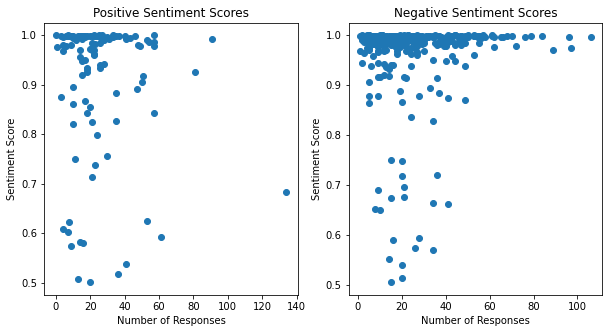

In [10]:
#plot the positive sentiment scores against number of responses
postive_df = main_df[main_df['sentiment_label'] == 'POSITIVE']
postive_df = postive_df[postive_df['number_responses'] <= 150]
negative_df = main_df[main_df['sentiment_label'] == 'NEGATIVE']
negative_df = negative_df[negative_df['number_responses'] <= 150]
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(postive_df['number_responses'], postive_df['sentiment_score'])
ax[0].set_title('Positive Sentiment Scores')
ax[0].set_xlabel('Number of Responses')
ax[0].set_ylabel('Sentiment Score')
ax[1].scatter(negative_df['number_responses'], negative_df['sentiment_score'])
ax[1].set_title('Negative Sentiment Scores')
ax[1].set_xlabel('Number of Responses')
ax[1].set_ylabel('Sentiment Score')
plt.show()


Wanted to check how sentiment analysis performed on just the slang terms themselves, providing a baseline of how the model could be influencing my analysis

In [16]:
# result = nlp("stacy")[0]
# print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
slang_sentiment_df = pd.DataFrame()
for slang in incels.get_slang(3):
    result = nlp(slang)[0]
    # print(f"{slang}: {result['label']}, with score: {round(result['score'], 4)}")
    slang_sentiment_df = slang_sentiment_df.append({'slang': slang, 'sentiment_label': result['label'], 'sentiment_score': result['score']}, ignore_index=True)


In [18]:
slang_sentiment_df['sentiment_polarity'] = slang_sentiment_df.apply(determine_polarity, axis=1)

It is interesting that the polarities of slang tend towards the extremes

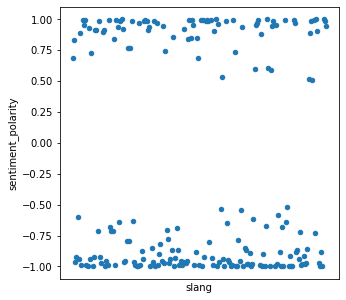

In [30]:
#plot the sentiment polarity of slang terms
slang_sentiment_df.plot.scatter(x='slang', y='sentiment_polarity', figsize=(5,5))
#rotate hide the x-axis labels
plt.xticks([])
plt.show()

In [104]:
avg_slang_sentiment = slang_sentiment_df['sentiment_polarity'].mean()
print(f"Average sentiment polarity of slang terms: {round(avg_slang_sentiment, 4)}")

Average sentiment polarity of slang terms: -0.1892


In [54]:
#create new dataframe with topics and sentiment polarity
topic_df = main_df[['thread_tag', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'sentiment_polarity']]

topic_df['thread_tag'].fillna('None', inplace=True)
topic_df

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,thread_tag,topic_0,topic_1,topic_2,topic_3,topic_4,sentiment_polarity
id,,,,,,,
main_1_0,None,0.000000,0.048980,0.000000,0.010219,0.925114,0.999593
main_2_0,[SuicideFuel],0.013247,0.000000,0.948931,0.014642,0.013470,-0.505297
main_2_1,[SuicideFuel],0.012106,0.000000,0.953846,0.013401,0.011997,-0.505297
main_2_2,[SuicideFuel],0.024265,0.017289,0.621499,0.312280,0.024667,-0.505297
main_2_3,[SuicideFuel],0.108892,0.079116,0.074626,0.118629,0.618737,-0.505297
...,...,...,...,...,...,...,...
main_601_12,None,0.071811,0.000000,0.261803,0.605310,0.056220,-0.940899
main_601_13,None,0.053664,0.039150,0.036893,0.059138,0.811156,-0.940899
main_601_14,None,0.073450,0.052390,0.049418,0.750371,0.074371,-0.940899


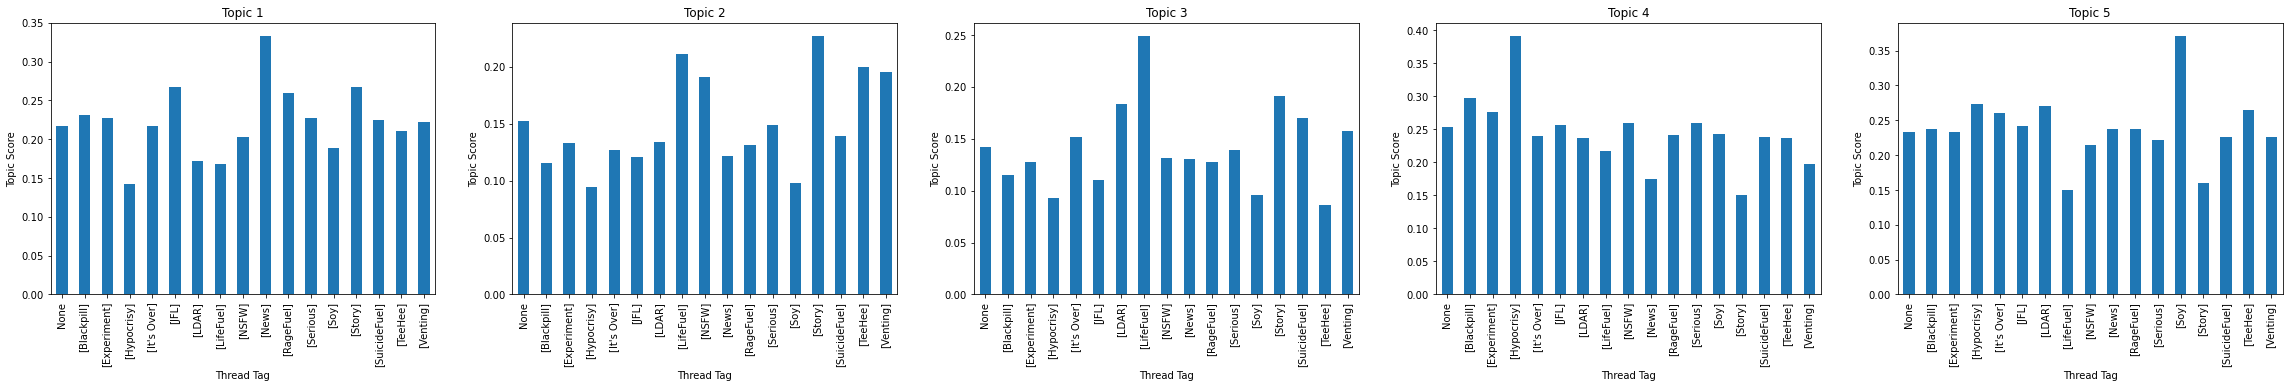

In [67]:
fig, ax = plt.subplots(1, 5, figsize=(40,5))
for topicNum in range(0,5):
    #plot topic score for each label
    topic_df.groupby('thread_tag')['topic_'+str(topicNum)].mean().plot.bar(ax=ax[topicNum])
    ax[topicNum].set_title('Topic '+str(topicNum + 1))
    ax[topicNum].set_xlabel('Thread Tag')
    ax[topicNum].set_ylabel('Topic Score')

plt.show()

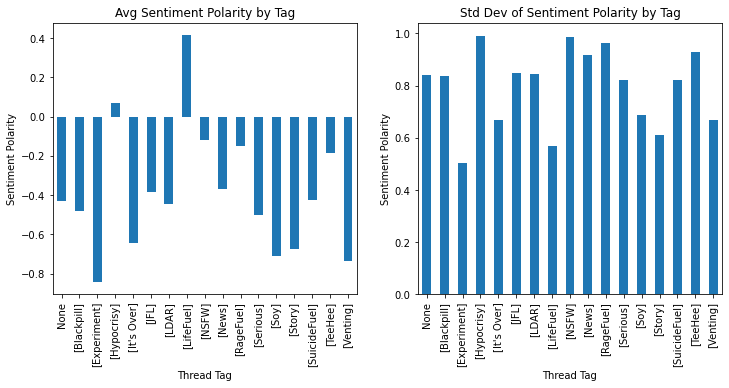

In [82]:
# fig, ax = plt.subplots(5, 4, figsize=(40,50))
# plot each tag's sentiment polarity
fig, ax = plt.subplots(1, 2, figsize=(12,5))
topic_df.groupby('thread_tag')['sentiment_polarity'].mean().plot.bar(ax=ax[0])
ax[0].set_title('Avg Sentiment Polarity by Tag')
ax[0].set_xlabel('Thread Tag')
ax[0].set_ylabel('Sentiment Polarity')
# plot standard deviation of sentiment polarity
topic_df.groupby('thread_tag')['sentiment_polarity'].std().plot.bar(ax=ax[1])
ax[1].set_title('Std Dev of Sentiment Polarity by Tag')
ax[1].set_xlabel('Thread Tag')
ax[1].set_ylabel('Sentiment Polarity')
plt.show()

In [89]:
main_df.columns

Index(['post_id', 'comment_id', 'thread_title', 'thread_tag', 'thread_author',
       'thread_time', 'username', 'user_label', 'post_time', 'raw_text',
       'tokens', 'normal_tokens', 'normal_tokens_POS', 'slang',
       'comment_length', 'number_responses', 'total_response_length',
       'length_quartile', 'reduced_tokens', 'topic_0', 'topic_1', 'topic_2',
       'topic_3', 'topic_4', 'sentiment_label', 'sentiment_score',
       'sentiment_polarity'],
      dtype='object')

In [101]:
slang_df = main_df[['thread_tag', 'number_responses', 'total_response_length', 'slang', 'sentiment_polarity']]

In [102]:
import ast

In [103]:
slang_df['slang'] = slang_df['slang'].fillna('[]')
slang_df['slang'] = slang_df['slang'].apply(ast.literal_eval)

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
slang_df['slang_count'] = slang_df['slang'].apply(len)

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
slang_df['slang_to_length']

,thread_tag,number_responses,total_response_length,slang,sentiment_polarity,slang_count
id,,,,,,
main_1_0,NaN,0.0,0.0,"[blackpill, incel, incel]",0.999593,3
main_2_0,[SuicideFuel],15.0,3250.0,[],-0.505297,0
main_2_1,[SuicideFuel],NaN,NaN,[],-0.505297,0
main_2_2,[SuicideFuel],NaN,NaN,[bbc],-0.505297,1
main_2_3,[SuicideFuel],NaN,NaN,[nofap],-0.505297,1
...,...,...,...,...,...,...
main_601_12,NaN,NaN,NaN,[],-0.940899,0
main_601_13,NaN,NaN,NaN,[],-0.940899,0
main_601_14,NaN,NaN,NaN,[],-0.940899,0


In [106]:
main_df.to_csv('main_detailed.csv')